# Component wise Gradient Boosting

In [1]:
import pandas as pd
import numpy as np
data = pd.read_excel(r'C_data.xlsx')
data.columns = ['Temp', 'Vaccum', 'Pressure', 'Humidity', 'Energy_Output']

Features consist of hourly average ambient variables 
- Temperature  in the range 1.81°C and 37.11°C,
- Pressure  in the range 992.89-1033.30 milibar,
- Humidity in the range 25.56% to 100.16%
- Vacuum in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output 420.26-495.76 MW


In [2]:
data

,Temp,Vaccum,Pressure,Humidity,Energy_Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
data.describe()

,Temp,Vaccum,Pressure,Humidity,Energy_Output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


**Impact of each attribute over Energy output**

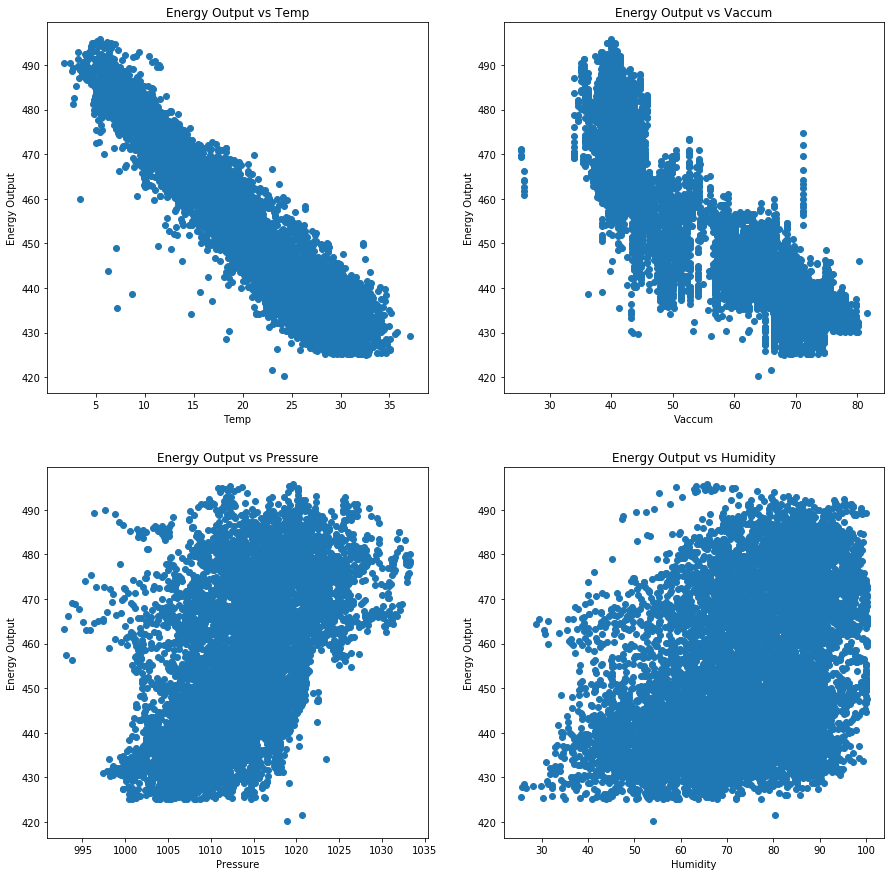

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

for i,column in enumerate(data.columns[:-1]): 
    plt.subplot(2,2,i+1)
    plt.scatter(data[column],data['Energy_Output'])
    plt.title("Energy Output vs " + column)
    plt.xlabel(column)
    plt.ylabel("Energy Output")

**Histogram of each attributes**

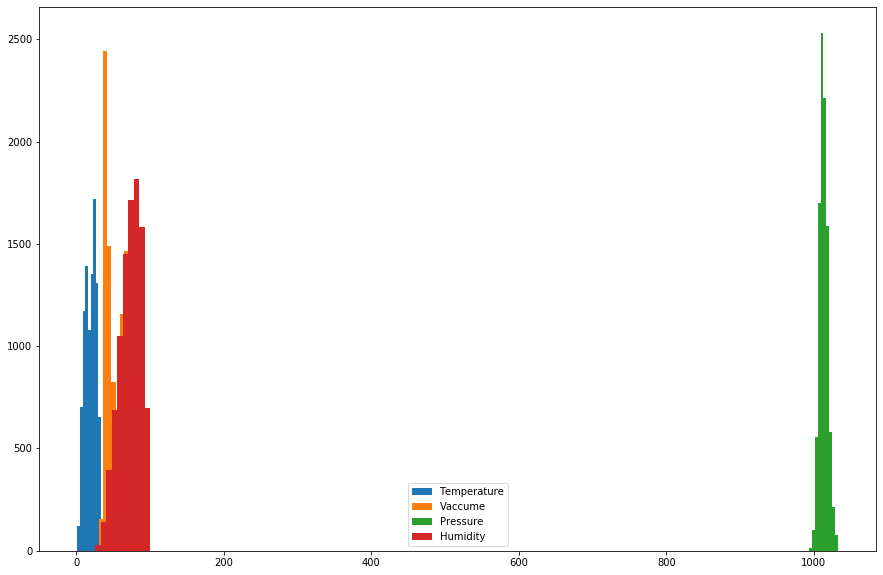

In [5]:
plt.figure(figsize=(15,10))
plt.hist(data['Temp'],label='Temperature')
plt.hist(data['Vaccum'],label='Vaccume')
plt.hist(data['Pressure'],label='Pressure')
plt.hist(data['Humidity'],label='Humidity')
plt.legend()

**Density Democtration**

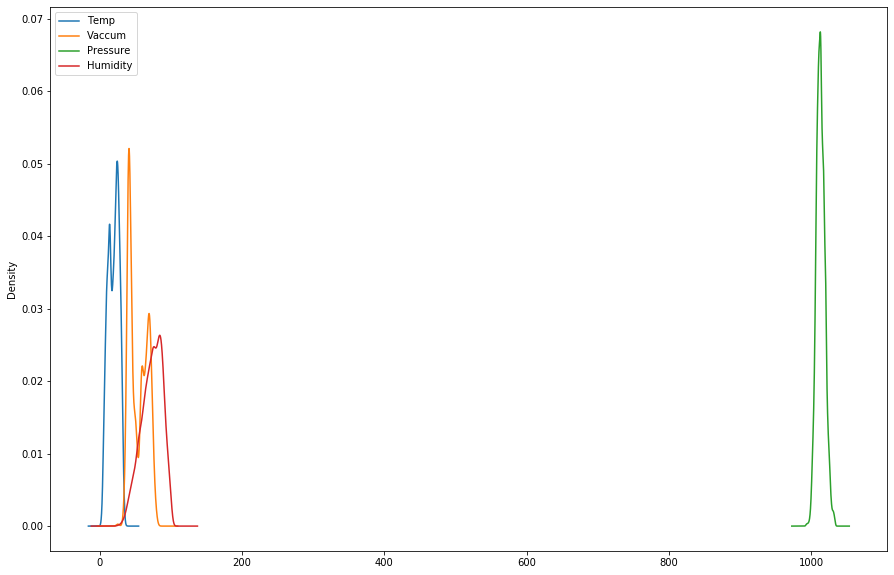

In [6]:
plt.figure(figsize=(15,10))
data['Temp'].plot(kind = 'density')
data['Vaccum'].plot(kind = 'density')
data['Pressure'].plot(kind = 'density')
data['Humidity'].plot(kind = 'density')
plt.legend()

* X are the features 
* y are the voltality

In [7]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

**Split the data into train and test** 

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7)

* Training Data 70%
* Testing Data 30%

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6697, 4)
(6697,)
(2871, 4)
(2871,)


**The Gradient Boosting Model**

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

**Model Accuracy Score**

In [11]:
model.fit(X_train,y_train)
score_gb = round(model.score(X_test,y_test)*100,2)
print("Accuracy Score:", score_gb)

Accuracy Score: 94.67


**Cross Validation of Model Performance**

In [12]:
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# report performance
print('Mean Absolute Error: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Absolute Error: -2.952 (0.077)


**XGBoost**

In [13]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [14]:
score_xgb = round(xgb_model.score(X_test,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: " + str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 96.35 %


**Scores**

In [15]:
from sklearn.metrics import mean_squared_error
import math
print("Mean Squared Error: " , mean_squared_error(y_test,Y_pred_xgb))
print("Root Mean Squard Error:", math.sqrt(mean_squared_error(y_test,Y_pred_xgb)))

Mean Squared Error:  10.5334883076874
Root Mean Squard Error: 3.2455335936772243


**Random Forest Algorithm**

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

**Accuracy**

In [17]:
score_rf = round(rf.score(X_test,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: " + str(score_rf)+" %")

The accuracy score achieved using XGBoost is: 95.94 %


**Scores**

In [18]:
from sklearn.metrics import mean_squared_error
import math
print("Mean Squared Error: " , mean_squared_error(y_test,y_pred))
print("Root Mean Squard Error:", math.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared Error:  11.714418752260507
Root Mean Squard Error: 3.422633306718747


**Comparing scores of all models**

In [19]:
# Comparing Scores
scores = [score_gb,score_xgb,score_rf]
algorithms = ["Gradiant boost","XGBoost","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Gradiant boost is: 94.67 %
The accuracy score achieved using XGBoost is: 96.35 %
The accuracy score achieved using Random Forest is: 95.94 %


**Plotting Scores**

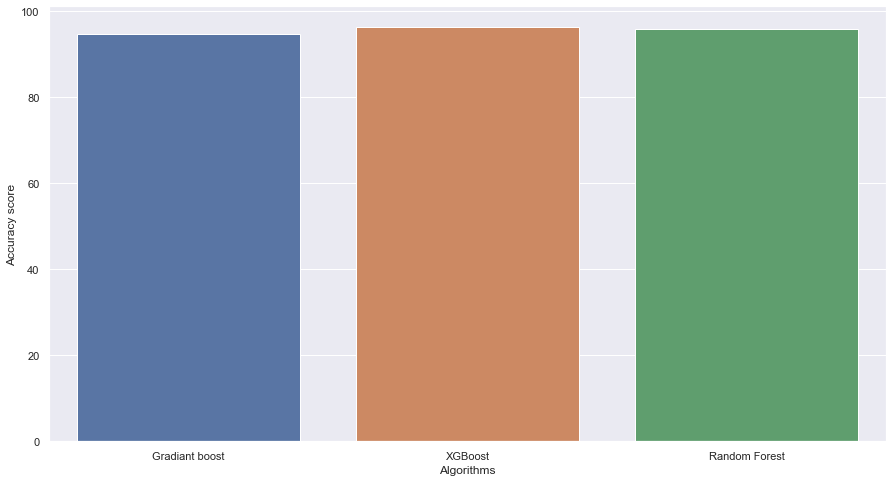

In [20]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)